In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

In [3]:
df = pd.read_csv(("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
y = df["happy"]
X = df.loc[:, ~df.columns.isin(["happy", "cntry"])]

pd.concat([X, pd.get_dummies(df["cntry"])], axis=1)

preds = pd.DataFrame()
labels = []

uniquex = df["happy"].unique()


Weak learner 0 R^2: -0.0016338612349253712
Weak learner 20 R^2: -0.0003087796032601453
Weak learner 40 R^2: -0.001019480021074548
Weak learner 60 R^2: -0.0006158612582376488
Weak learner 80 R^2: -0.0010829233053075704
Weak learner 100 R^2: -0.0002853321753819582


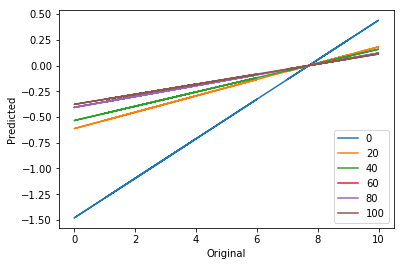

Overall R^2:
0.2448903229695891


In [10]:
for m in range(0,101):
    decision_tree = tree.DecisionTreeRegressor(max_depth=2)
    decision_tree.fit(X,y)
    pred = decision_tree.predict(X)
    preds["pred{}".format(m)] = pred
    y = y-pred
    if m % 20 == 0:
        print("Weak learner {} R^2: {}".format(m, decision_tree.score(X,y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(df["happy"], bestpred, 1))(uniquex))

plt.legend(labels)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df['happy'], predicted)[0, 1])

One strongish learner R^2: 0.06434830805206782


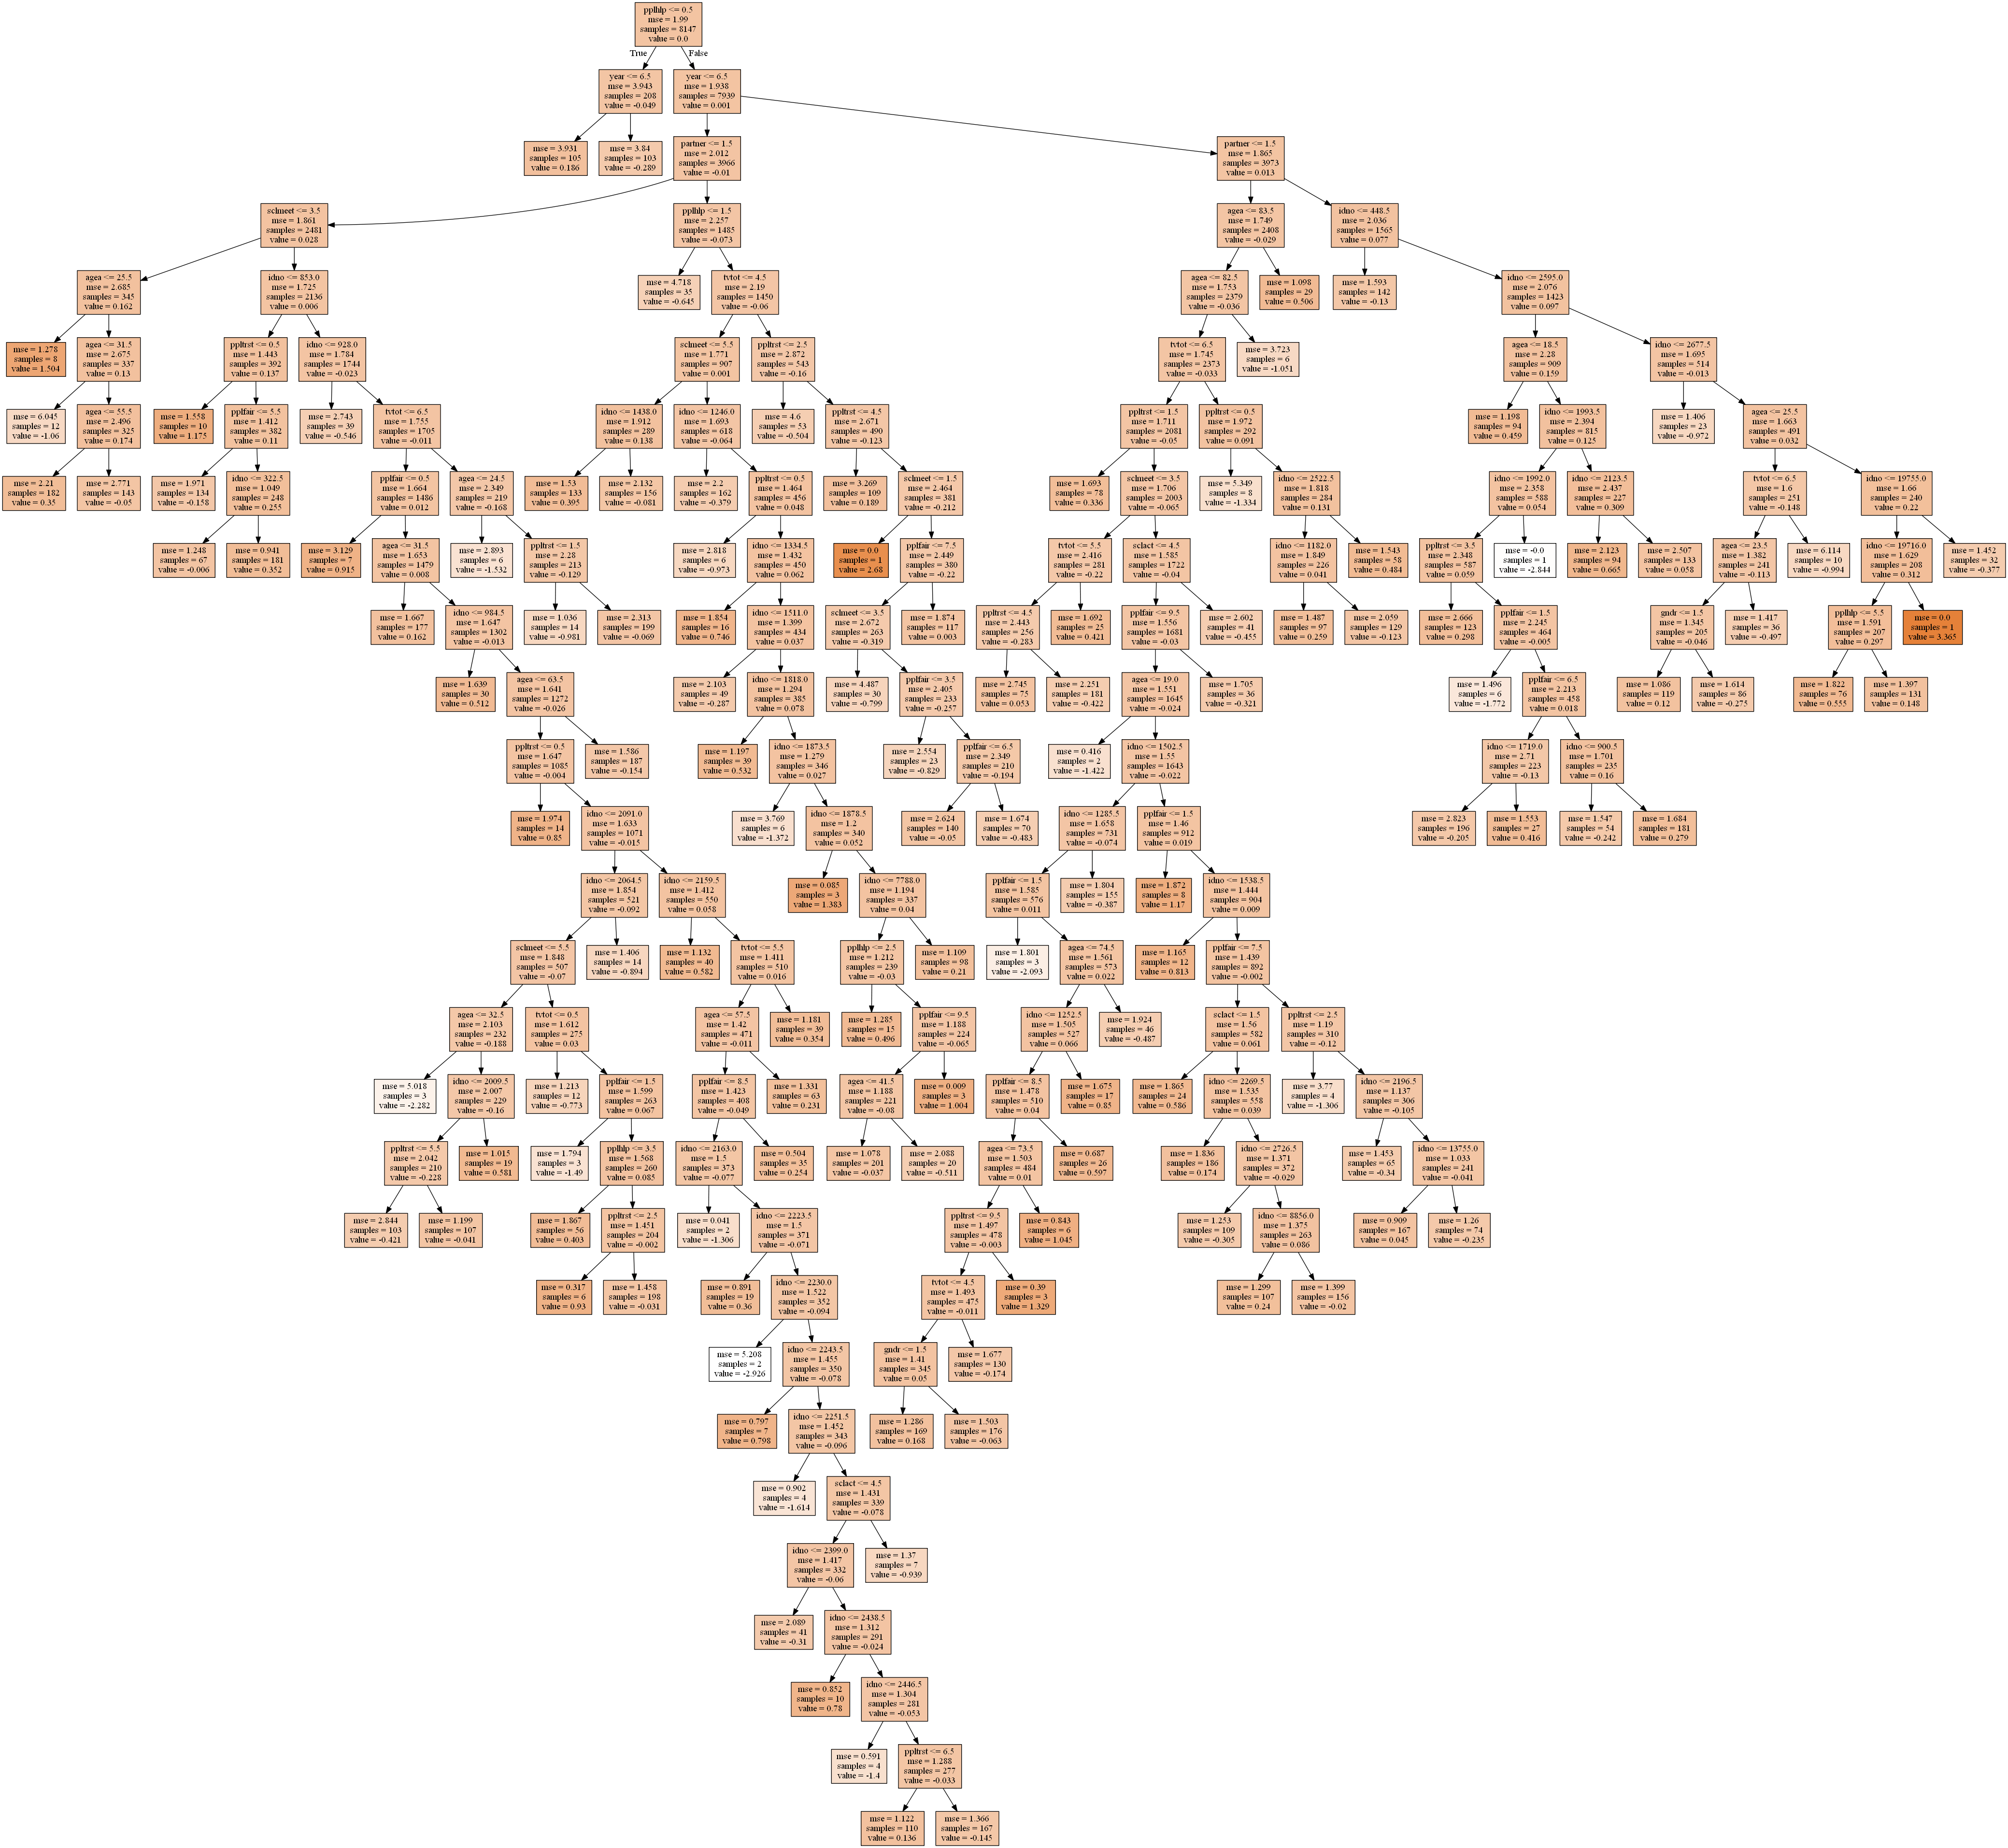

In [11]:
decision_tree = tree.DecisionTreeRegressor(min_samples_split=.025)
decision_tree.fit(X,y)

#Get and store predicted values.
pred = decision_tree.predict(X)
print('One strongish learner R^2: {}'.format(decision_tree.score(X, y)))

dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=X.columns,  
                                filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())  